# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1 Import necessary libraries

In [1]:
# Libraries to load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Load the data from csv file to `pandas` dataframe

In [4]:
df = pd.read_csv('car_data.csv')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


#### 3. Inspect the first 5 rows of the dataframe

In [3]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### 4. Check the number of rows and columns

In [6]:
df.shape

(804, 12)

#### 5. Get some information about the dataset via `.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#### 6. Check number of missing values per columns

In [8]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

#### 7. Get table of distributions each features and visualize this distribution.

In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Cylinder'}>],
       [<AxesSubplot:title={'center':'Liter'}>,
        <AxesSubplot:title={'center':'Doors'}>,
        <AxesSubplot:title={'center':'Cruise'}>],
       [<AxesSubplot:title={'center':'Sound'}>,
        <AxesSubplot:title={'center':'Leather'}>, <AxesSubplot:>]],
      dtype=object)

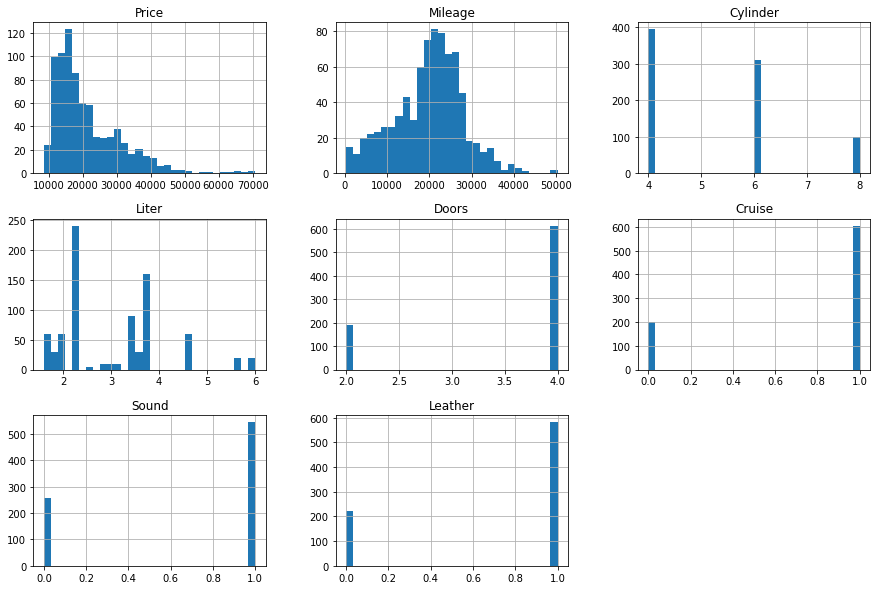

In [18]:
df.hist(bins=30, figsize=(15, 10))

#### 8. Visualize correlation coefficient between features and label.

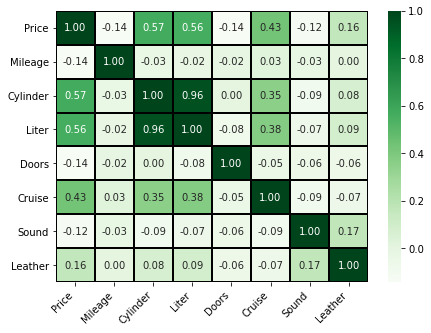

In [23]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths = 0.01, linecolor='black', cmap='Greens')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
plt.show()

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Cylinder', 'Liter','Cruise','Sound','Leather']], df.Price, test_size = 0.1, shuffle = True, random_state = 42)

#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 3185.16913773,   117.80273402,  6201.83212614, -1815.83472807,
         3273.4286781 ]),
 -1603.5987771883993)

In [77]:
#Without a constant
import statsmodels.api as sm
X = df[['Cylinder', 'Liter','Cruise','Sound','Leather']]
y = df['Price']
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              1375.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                        0.00
Time:                        13:32:58   Log-Likelihood:                         -8324.0
No. Observations:                 804   AIC:                                  1.666e+04
Df Residuals:                     799   BIC:                                  1.668e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cylinder    2579.9375    440.950      5.851      0.000    1714.381    3445.494
Liter        705.3505    683.415      1.032      0.302    -636.150    2046.851
Cruise      6110.1359    663.049      9.215      0.000    4808.611    7411.661
Sound      -1979.9645    555.415     -3.565      0.000   -3070.209    -889.720
Leather     3314.3414    599.003      5.533      0.000    2138.536    4490.147
==============================================================================
Omnibus:                      223.292   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              606.465
Skew:                           1.403   Prob(JB):                    2.03e-132
Kurtosis:                       6.198   Cond. No.                         19.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
import statsmodels.api as sm
x = sm.add_constant(x_test) #b Hằng số, Hệ số chặn
y = y_test
model1 = LinearRegression()
# Ordinary Least Square Linear Regression
model1 = sm.OLS(y,x)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     8.290
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.82e-06
Time:                        11:32:08   Log-Likelihood:                -837.47
No. Observations:                  81   AIC:                             1687.
Df Residuals:                      75   BIC:                             1701.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        540.3958   5735.381      0.094      0.925   -1.09e+04     1.2e+04
Cylinder    2109.4191   2506.511      0.842      0.403   -2883.807    7102.646
Liter        845.3609   3212.388      0.263      0.793   -5554.045    7244.767
Cruise      6430.8467   2163.112      2.973      0.004    2121.707    1.07e+04
Sound      -1579.0931   2050.870     -0.770      0.444   -5664.636    2506.450
Leather     4604.1346   1925.291      2.391      0.019     768.759    8439.510
==============================================================================
Omnibus:                       30.302   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.595
Skew:                           1.355   Prob(JB):                     4.22e-14
Kurtosis:                       6.302   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tại sao R^2 lớn đối với mô hình tuyến tính không có hệ số chặn?

#### 11. Evaluate your model performance using R-squared Error.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ypred_test = model.predict(x_test)
r2_score(y_test, ypred_test)

0.34519244020746276

#### 12. Visualize the actual prices and predicted prices of the test set.

In [62]:
car_price_manual = model.coef_[0]*df.Cylinder + model.coef_[1]*df.Liter + model.coef_[2]*df.Cruise + model.coef_[3]*df.Sound + model.coef_[4]*df.Leather + model.intercept_
car_price_predict = pd.DataFrame({'auto': model.predict(df[['Cylinder', 'Liter','Cruise','Sound','Leather']]),
             'manual': car_price_manual })
car_price_predict

,auto,manual
0,25532.030601,25532.030601
1,22258.601923,22258.601923
2,22258.601923,22258.601923
3,24074.436651,24074.436651
4,27347.865329,27347.865329
...,...,...
799,24062.656377,24062.656377
800,22246.821649,22246.821649
801,22246.821649,22246.821649
802,22246.821649,22246.821649


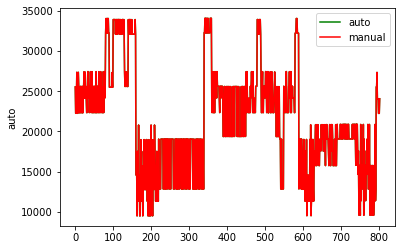

<Figure size 1080x720 with 0 Axes>

In [75]:
sns.lineplot(x = car_price_predict.index,y = car_price_predict.auto,color = 'g')
sns.lineplot(x = car_price_predict.index,y = car_price_predict.manual,color = 'r')
plt.legend(['auto','manual'],loc ='upper right')
plt.figure(figsize=(15,10))
plt.show()